In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['df_target'] = data.target
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [3]:
pd.concat([df.head(10), df.tail(10)])

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,df_target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   df_target   20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


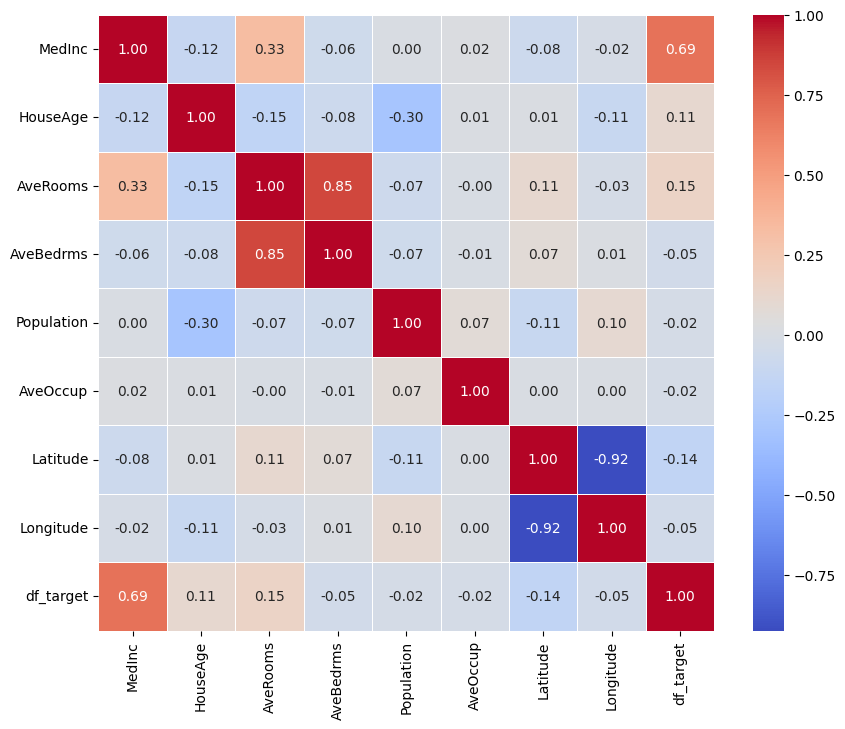

In [5]:
import seaborn as sns

corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.show()


In [6]:
from sklearn.model_selection import train_test_split

y = df['df_target']
X = df.drop('df_target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((16512, 8), (16512,)), ((4128, 8), (4128,)))

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def get_r2_rmse(X, y, model=None):
    if model is None:
        model = LinearRegression()
    model.fit(X, y)
    pred = model.predict(X_test)
    return (r2_score(y_test, pred), np.sqrt(mean_squared_error(y_test, pred)))

res = get_r2_rmse(X_train, y_train)
print(f"Root mean squared error: {res[1]}")
print(f"R2 score: {res[0]}")

Root mean squared error: 0.7455813830127761
R2 score: 0.5757877060324511


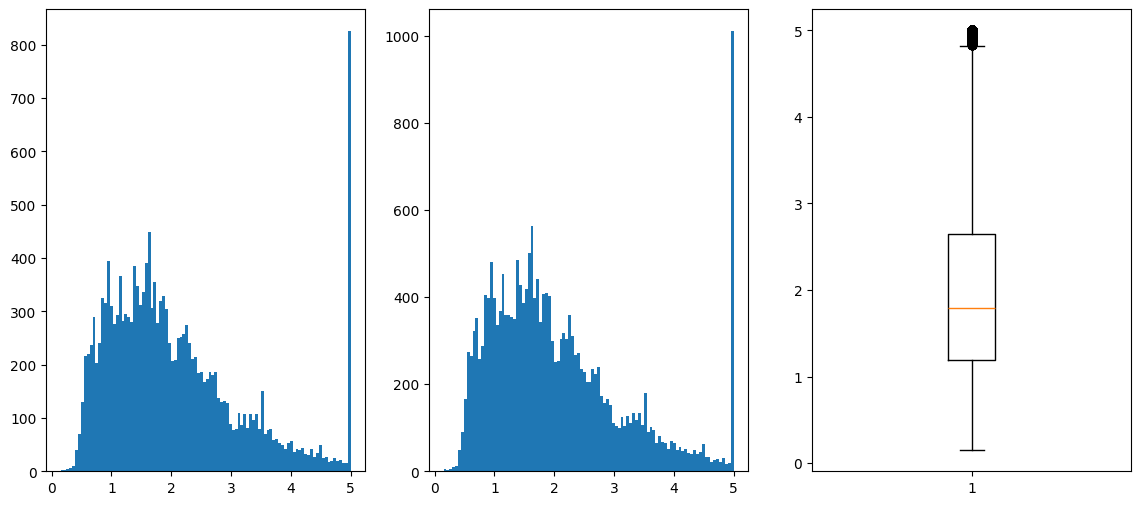

In [9]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
plt.hist(y_train, bins=100)
plt.subplot(1, 3, 2)
plt.hist(y, bins=100)
plt.subplot(1, 3, 3)
plt.boxplot(y)
plt.subplots_adjust(wspace=0.2)
plt.show()

In [10]:
y_train.value_counts()

df_target
5.00001    786
1.37500     93
1.62500     89
1.12500     82
1.87500     73
          ... 
2.74800      1
4.29000      1
3.10500      1
4.18400      1
4.41400      1
Name: count, Length: 3675, dtype: int64

аномальное значение в target > 5

In [11]:
df[df['df_target'] > 5]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,df_target
89,1.2434,52.0,2.929412,0.917647,396.0,4.658824,37.80,-122.27,5.00001
459,1.1696,52.0,2.436000,0.944000,1349.0,5.396000,37.87,-122.25,5.00001
493,7.8521,52.0,7.794393,1.051402,517.0,2.415888,37.86,-122.24,5.00001
494,9.3959,52.0,7.512097,0.955645,1366.0,2.754032,37.85,-122.24,5.00001
509,7.8772,52.0,8.282548,1.049861,947.0,2.623269,37.83,-122.23,5.00001
...,...,...,...,...,...,...,...,...,...
20422,5.1457,35.0,6.958333,1.217593,576.0,2.666667,34.14,-118.90,5.00001
20426,10.0472,11.0,9.890756,1.159664,415.0,3.487395,34.18,-118.69,5.00001
20427,8.6499,4.0,7.236059,1.032528,5495.0,2.553439,34.19,-118.80,5.00001
20436,12.5420,10.0,9.873315,1.102426,1179.0,3.177898,34.21,-118.69,5.00001


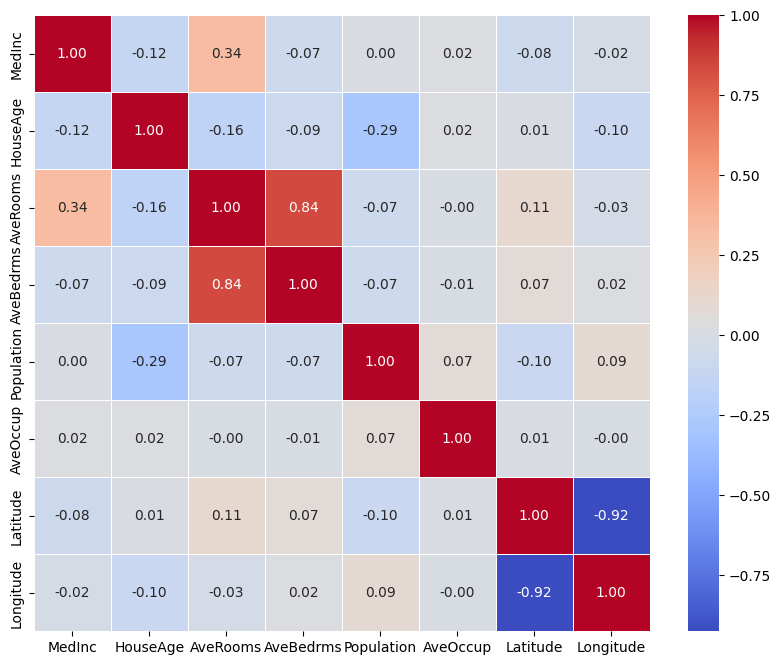

In [12]:
corr = X_train.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.show()

Удалите признаки на основании полученных значений, выводов.

In [13]:
df.drop(df[df['df_target'] > 5].index, inplace=True)

In [14]:
def attr_to_mean(cols):
    return cols.mean()

df['Location'] = df[['Latitude', 'Longitude']].apply(attr_to_mean, axis=1)
df.drop(['Latitude', 'Longitude'], axis=1, inplace=True)
df['AveRooms_mean'] = df[['AveRooms', 'AveBedrms']].apply(attr_to_mean, axis=1)
df.drop(['AveRooms', 'AveBedrms'], axis=1, inplace=True)
df


,MedInc,HouseAge,Population,AveOccup,df_target,Location,AveRooms_mean
0,8.3252,41.0,322.0,2.555556,4.526,-42.175,4.003968
1,8.3014,21.0,2401.0,2.109842,3.585,-42.180,3.605009
2,7.2574,52.0,496.0,2.802260,3.521,-42.195,4.680791
3,5.6431,52.0,558.0,2.547945,3.413,-42.200,3.445205
4,3.8462,52.0,565.0,2.181467,3.422,-42.200,3.681467
...,...,...,...,...,...,...,...
20635,1.5603,25.0,845.0,2.560606,0.781,-40.805,3.089394
20636,2.5568,18.0,356.0,3.122807,0.771,-40.860,3.714912
20637,1.7000,17.0,1007.0,2.325635,0.923,-40.895,3.162818
20638,1.8672,18.0,741.0,2.123209,0.847,-40.945,3.250716


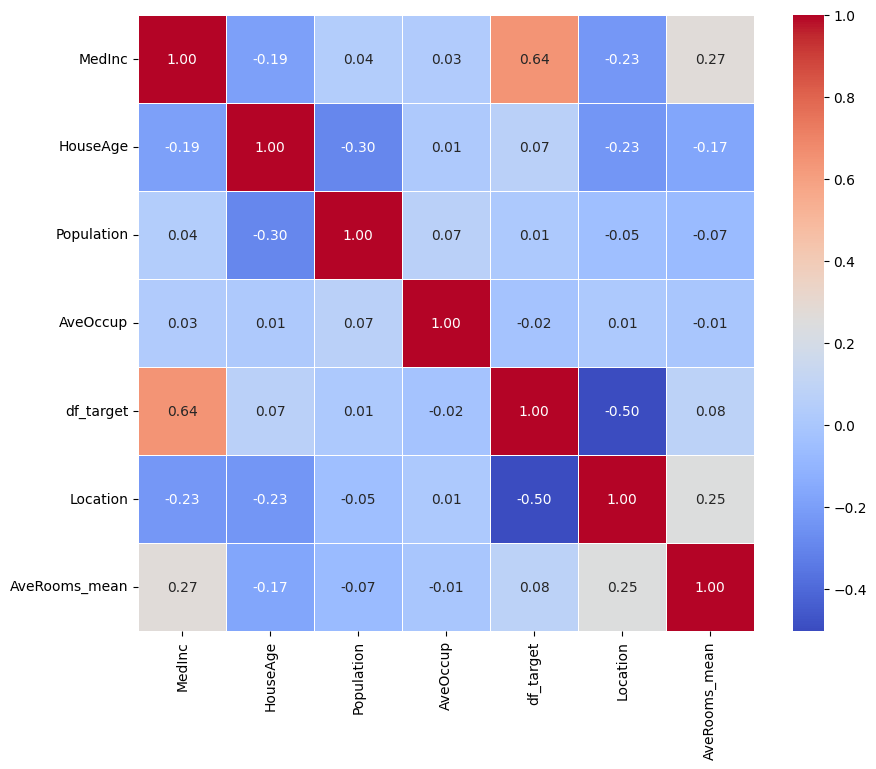

In [15]:
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.show()

In [16]:
y = df['df_target']
X = df.drop('df_target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((15740, 6), (15740,)), ((3935, 6), (3935,)))

In [18]:
res = get_r2_rmse(X_train, y_train)
print(f"Root mean squared error: {res[1]}")
print(f"R2 score: {res[0]}")

Root mean squared error: 0.6635821695296633
R2 score: 0.5583773722378976


In [19]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['df_target'] = data.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,df_target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.

In [20]:
import functools

def attr_to_pow(cols):
    return cols ** 2

def attr_to_multiply(cols):
    return functools.reduce(lambda x, y: x * y, cols)

def attr_divide(cols):
    return functools.reduce(lambda x, y: x / y, cols)

def attr_to_1(col):
    return 1 / (1 + col)

df.drop(df[df['df_target'] > 5].index, inplace=True)

df['AveOccup'] = df['AveOccup'].apply(attr_to_pow)
df['MedInc_vs'] = df[['MedInc', 'AveBedrms', 'HouseAge']].apply(attr_to_multiply, axis=1)
df['MedInc_vs'] = df[['MedInc_vs', 'Population']].apply(attr_divide, axis=1)
df['Latitude'] = df['Latitude'].apply(attr_to_1)
df['Longitude'] = df['Longitude'].apply(attr_to_1)

pd.concat([df.head(10), df.tail(10)])

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,df_target,MedInc_vs
0,8.3252,41.0,6.984127,1.023810,322.0,6.530864,0.025720,-0.008249,4.526,1.085280
1,8.3014,21.0,6.238137,0.971880,2401.0,4.451433,0.025733,-0.008249,3.585,0.070565
2,7.2574,52.0,8.288136,1.073446,496.0,7.852660,0.025740,-0.008248,3.521,0.816739
3,5.6431,52.0,5.817352,1.073059,558.0,6.492025,0.025740,-0.008247,3.413,0.564301
4,3.8462,52.0,6.281853,1.081081,565.0,4.758799,0.025740,-0.008247,3.422,0.382688
5,4.0368,52.0,4.761658,1.103627,413.0,4.579156,0.025740,-0.008247,2.697,0.560935
6,3.6591,52.0,4.931907,0.951362,1094.0,4.530106,0.025747,-0.008247,2.992,0.165465
7,3.1200,52.0,4.797527,1.061824,1157.0,3.197851,0.025747,-0.008247,2.414,0.148894
8,2.0804,42.0,4.294118,1.117647,1206.0,4.108286,0.025747,-0.008247,2.267,0.080975
9,3.6912,52.0,4.970588,0.990196,1551.0,4.718752,0.025747,-0.008247,2.611,0.122541


In [21]:
for col in df.columns:
    if col == 'df_target':
        continue
    print("Drop col: ", col)
    temp_df = df.drop(col, axis=1)
    y = temp_df['df_target']
    X = temp_df.drop('df_target', axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    res = get_r2_rmse(X_train, y_train)
    print(f"Root mean squared error: {res[1]}")
    print(f"R2 score: {res[0]}")
    print()


Drop col:  MedInc
Root mean squared error: 0.790275272818049
R2 score: 0.37364768299753526

Drop col:  HouseAge
Root mean squared error: 0.6564299267259952
R2 score: 0.567845891390352

Drop col:  AveRooms
Root mean squared error: 0.6588726279242095
R2 score: 0.5646236511969148

Drop col:  AveBedrms
Root mean squared error: 0.6637528950866795
R2 score: 0.5581501028159478

Drop col:  Population
Root mean squared error: 0.6495656278818449
R2 score: 0.576836721326256

Drop col:  AveOccup
Root mean squared error: 0.6496069774109321
R2 score: 0.5767828448325709

Drop col:  Latitude
Root mean squared error: 0.7014389185391859
R2 score: 0.5065517436787831

Drop col:  Longitude
Root mean squared error: 0.7027381890712674
R2 score: 0.5047220289730183

Drop col:  MedInc_vs
Root mean squared error: 0.6510833045637414
R2 score: 0.574857012807308



### Выводы по ноутбуку

1. **Исследование данных и предварительный анализ**
    - Набор данных "California Housing" содержит информацию о домах в Калифорнии, включая такие атрибуты, как медианный доход, возраст дома, количество комнат и спален, население, среднее количество жильцов, широта и долгота. Целевая переменная - это медианная стоимость домов в сотнях тысяч долларов.
    - В наборе данных 20640 записей, отсутствуют пропущенные значения.

2. **Корреляционный анализ**
    - Корреляционная матрица показала значительные корреляции между различными признаками. Наиболее сильная корреляция наблюдается между медианным доходом (MedInc) и медианной стоимостью домов (df_target), что ожидаемо.

3. **Разделение данных на тренировочную и тестовую выборки**
    - Данные были разделены на тренировочный (80%) и тестовый (20%) наборы с помощью функции `train_test_split` из библиотеки `sklearn`.

4. **Модель линейной регрессии**
    - Линейная регрессия была использована для предсказания стоимости домов. 
    - Начальные результаты показали, что модель имеет коэффициент детерминации \(R^2 = 0.5758\) и корень из среднеквадратичной ошибки \(RMSE = 0.7456\).

5. **Анализ распределения целевой переменной**
    - Гистограммы и коробчатые диаграммы показали, что распределение медианной стоимости домов скошено влево, с наибольшей плотностью в нижнем диапазоне значений.

6. **Обработка выбросов**
    - Были выявлены и удалены выбросы с медианной стоимостью домов выше 5 (в сотнях тысяч долларов), что улучшило показатели модели.
    - После удаления выбросов и повторного обучения модели, показатели улучшились: \(R^2 = 0.5584\), \(RMSE = 0.64\).

7. **Создание новых признаков**
    - Были созданы новые признаки, такие как "Location" (среднее значение широты и долготы) и "AveRooms_mean" (среднее значение количества комнат и спален).
    - Эти новые признаки использовались для дальнейшего анализа и улучшения модели.

8. **Итог**
    - Модель линейной регрессии показала приемлемые результаты для предсказания стоимости домов в Калифорнии. Тем не менее, существует потенциал для улучшения точности модели путем добавления новых признаков и использования более сложных моделей машинного обучения.

<div style="font-size: 100px;" align="center">:)</div>